In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
data = []
labels = []
classes = 43
cur_path = 'C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification'

In [3]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)

            
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
data = np.array(data)
labels = np.array(labels)


In [5]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 32, 32, 3) (39209,)


In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [7]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [10]:
import keras
sgd=keras.optimizers.SGD(lr=0.01)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 101s 3ms/step - loss: 3.8220 - accuracy: 0.2510 - val_loss: 1.3943 - val_accuracy: 0.6438
Epoch 2/15
31367/31367 [==============================] - 99s 3ms/step - loss: 1.4190 - accuracy: 0.5991 - val_loss: 0.7006 - val_accuracy: 0.8108
Epoch 3/15
31367/31367 [==============================] - 99s 3ms/step - loss: 0.9700 - accuracy: 0.7170 - val_loss: 0.4767 - val_accuracy: 0.8761
Epoch 4/15
31367/31367 [==============================] - 102s 3ms/step - loss: 0.7779 - accuracy: 0.7705 - val_loss: 0.4066 - val_accuracy: 0.8892
Epoch 5/15
31367/31367 [==============================] - 101s 3ms/step - loss: 0.6875 - accuracy: 0.7942 - val_loss: 0.3027 - val_accuracy: 0.9132
Epoch 6/15
31367/31367 [==============================] - 98s 3ms/step - loss: 0.6034 - accuracy: 0.8201 - val_loss: 0.2683 - val_accuracy: 0.9318
Epoch 7/15
31367/31367 [==============================] - 96s 3ms/

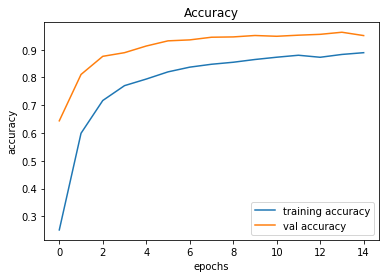

In [12]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

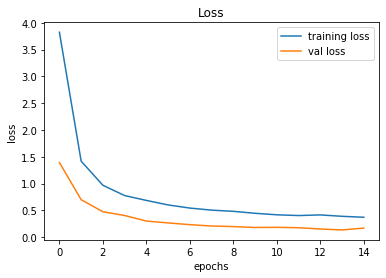

In [13]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
model=load_model('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\my_model.h5')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [13]:
from keras.utils import plot_model

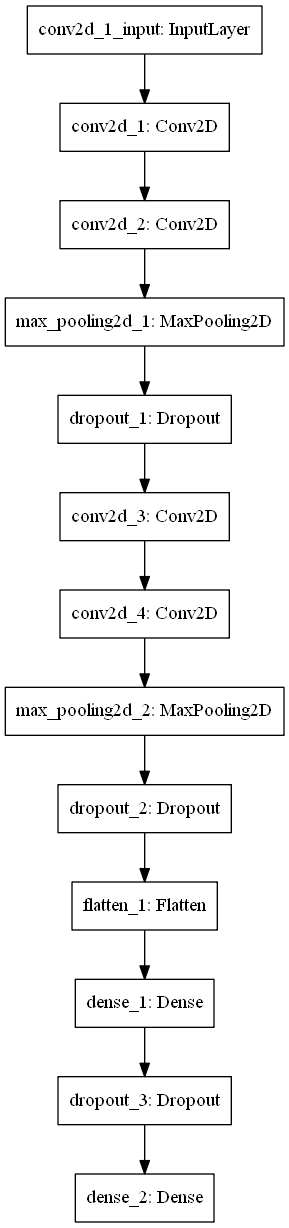

In [14]:
plot_model(model,to_file='C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\model.png')

In [28]:
y_test = pd.read_csv('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\Test.csv')

label= y_test["ClassId"].values
imgs = y_test["Path"].values

In [29]:
imgs='C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/'+imgs

In [30]:
imgs

array(['C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/00000.png',
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/00001.png',
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/00002.png',
       ...,
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/12627.png',
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/12628.png',
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/12629.png'],
      dtype=object)

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35, 12,  7, 23,  7,  4,  9, 21,
       20, 27, 38,  4, 33,  9,  3,  1, 11, 13, 10,  9, 11,  5, 17, 34, 23,
        2, 17,  3, 12, 16,  8,  7, 30, 18], dtype=int64)

In [31]:
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

In [32]:
pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.953285827395091


In [89]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(labels,pred)


In [62]:
classs = [ 'Speed limit (20km/h)',
           'Speed limit (30km/h)',      
            'Speed limit (50km/h)',       
            'Speed limit (60km/h)',      
            'Speed limit (70km/h)',    
            'Speed limit (80km/h)',      
            'End of speed limit (80km/h)',     
            'Speed limit (100km/h)',    
            'Speed limit (120km/h)',     
           'No passing',   
           'No passing veh over 3.5 tons',     
           'Right-of-way at intersection',     
           'Priority road',    
           'Yield',     
           'Stop',       
           'No vehicles',       
           'Veh > 3.5 tons prohibited',       
           'No entry',       
           'General caution',     
           'Dangerous curve left',      
           'Dangerous curve right',   
           'Double curve',      
           'Bumpy road',     
           'Slippery road',       
           'Road narrows on the right',  
           'Road work',    
           'Traffic signals',      
           'Pedestrians',     
           'Children crossing',     
           'Bicycles crossing',       
           'Beware of ice/snow',
           'Wild animals crossing',      
           'End speed + passing limits',      
           'Turn right ahead',     
           'Turn left ahead',       
           'Ahead only',      
           'Go straight or right',      
           'Go straight or left',      
           'Keep right',     
           'Keep left',      
           'Roundabout mandatory',     
           'End of no passing',      
           'End no passing veh > 3.5 tons' ]

In [71]:
from sklearn.metrics import classification_report
cf=classification_report(label,pred,target_names=classs,output_dict=True)

In [94]:
for i in range(43):
    cls=classs[i]
    print(cls,cf[cls])
    
    

Speed limit (20km/h) {'precision': 1.0, 'recall': 0.7833333333333333, 'f1-score': 0.8785046728971964, 'support': 60}
Speed limit (30km/h) {'precision': 0.9553450608930988, 'recall': 0.9805555555555555, 'f1-score': 0.9677861549006168, 'support': 720}
Speed limit (50km/h) {'precision': 0.9712418300653595, 'recall': 0.9906666666666667, 'f1-score': 0.9808580858085809, 'support': 750}
Speed limit (60km/h) {'precision': 0.9530201342281879, 'recall': 0.9466666666666667, 'f1-score': 0.9498327759197325, 'support': 450}
Speed limit (70km/h) {'precision': 0.9846390168970814, 'recall': 0.9712121212121212, 'f1-score': 0.9778794813119756, 'support': 660}
Speed limit (80km/h) {'precision': 0.9252336448598131, 'recall': 0.9428571428571428, 'f1-score': 0.9339622641509434, 'support': 630}
End of speed limit (80km/h) {'precision': 1.0, 'recall': 0.8333333333333334, 'f1-score': 0.9090909090909091, 'support': 150}
Speed limit (100km/h) {'precision': 0.9719626168224299, 'recall': 0.9244444444444444, 'f1-sco

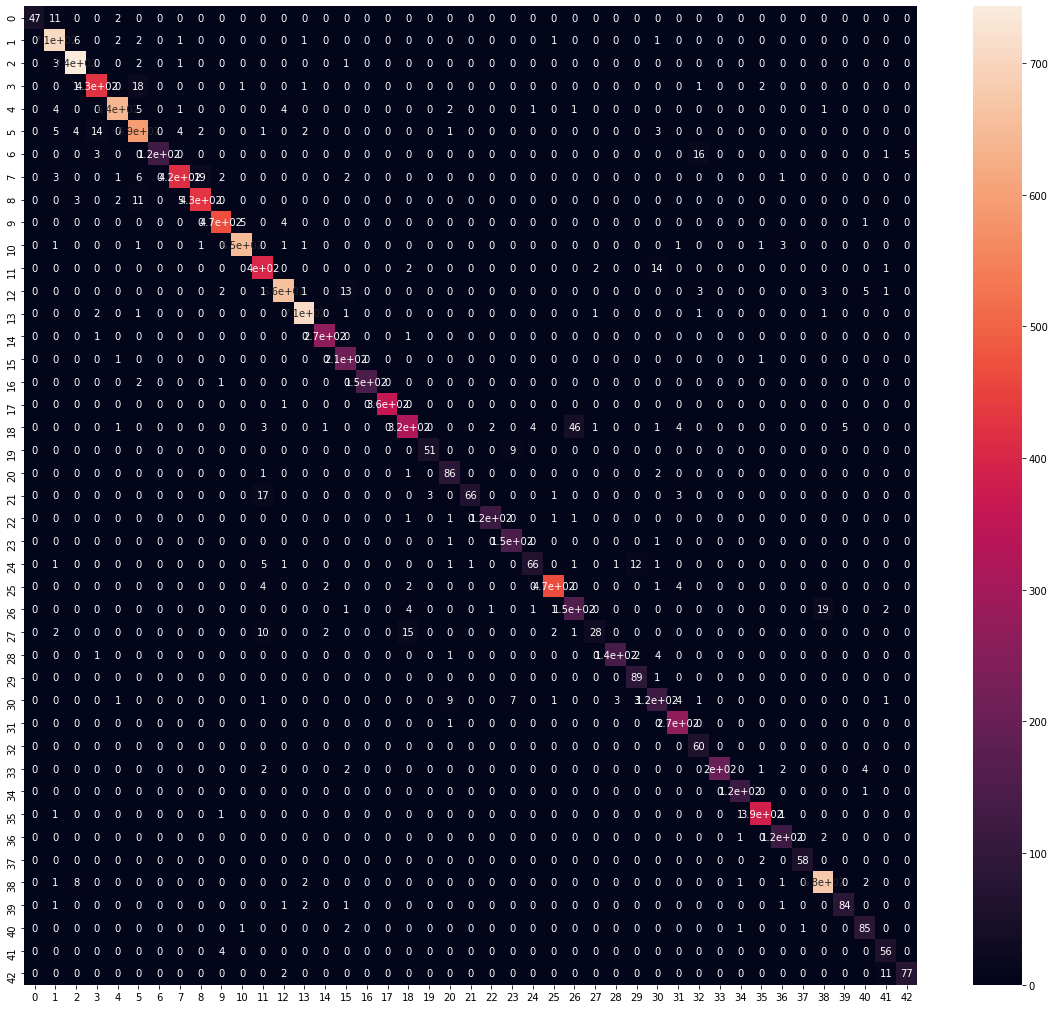

In [90]:
import seaborn as sns
fig_dims=(20,18)
fig, ax = plt.subplots(figsize=fig_dims)
cmplot=sns.heatmap(cm,annot=True)
fig.savefig('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\cmplot.png')

In [95]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
#model = load_model('traffic_classifier.h5')

In [96]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

In [97]:
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)


In [98]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    print(image.shape)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
   

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

In [99]:
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

(1, 30, 30, 3)
Pedestrians
